In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

import ParallelPlot

sns.set(style="ticks", color_codes=True)

# Data Input and Manipulation
This notebook serves to analyze the output data from a series of Platypus runs. These platypus runs examined the effect of different sets of action levers (based on the 12 actions we have implemented for this project - see the report) on the different scenario buckets: 

* Low infectious, Low death rate
* Low infectious, High death rate
* High infectious, Low death rate
* High infectious, High death rate

The script used to generate the output data sets is called `MORDM_actions.py` and can be found in the root folder of this project repository. 

**Note**: The outcome `Infectious population` was calculated using the end value of the stock. Additional analysis of the high and low `Basic reprodution number` shows that the majority of high value cases end with a lower value in the `Infectious population` stock. For these results, see the bottom of this script.

## Parallel Plots
The first set of analysis plots the connections between the outcomes of the results. After running the code in this section, you can see a few interesting relationships: 

* All four parallel plots indicate an inverse relationship between the end value of the `Infectious population` stock and the `Stock Societal Stress`. Keeping in mind the note, above, this indicates that higher infectious populations lead to higher societal stress from the policies used to address those infections

* There is also an inverse relationship with `Deceased population` and `Stock Total Effort` - the more effort given, the fewer deaths occured.

* The second set of charts show that similar relationships hold between `Deceased population` and `Stock Societal Stress`, and `Infectious population` and `Stock Total Effort`

In [2]:
def parsePlatypusData(infectious, death, leverKey='Lever'): 

    file = './platypus_results/'+ infectious + 'I_' + death + 'D.csv'
    results = pd.read_csv(file, index_col='Unnamed: 0')

    for column in results:
        if 'Lever' in column: 
            results[column] = results[column].round().astype(int)

    levers = results.select(lambda x: re.search(leverKey, x), axis=1)
    outcomes = results.select(lambda x: not re.search(leverKey, x), axis=1)
    
    cols = ['Stock Total Effort', 'Deceased population', 'Infectious population', 'Stock Societal Stress']
    outcomes = outcomes[cols]
    
    return {'levers':levers, 'outcomes':outcomes}

In [3]:
results = []
options = [['low', 'low'],['low', 'high'],['high', 'low'],['high', 'high']]

for option in options: 
    results.append(parsePlatypusData(option[0], option[1]))

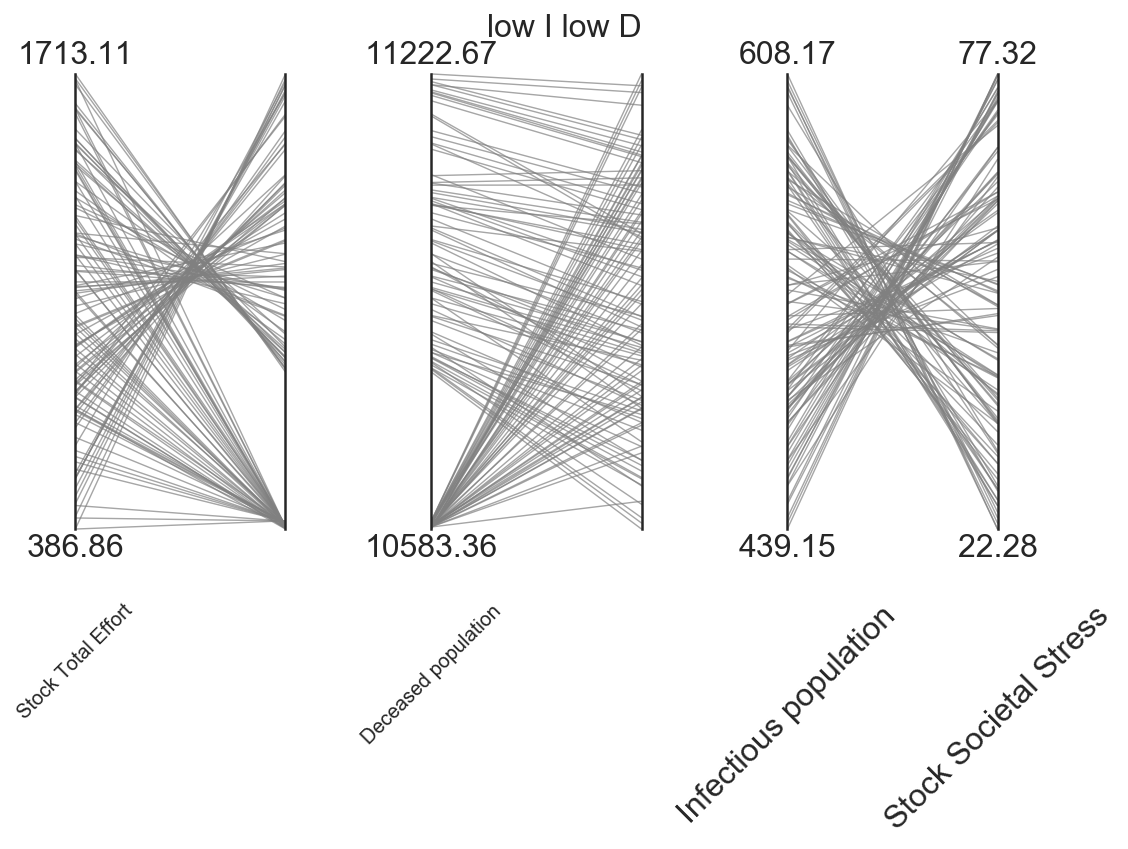

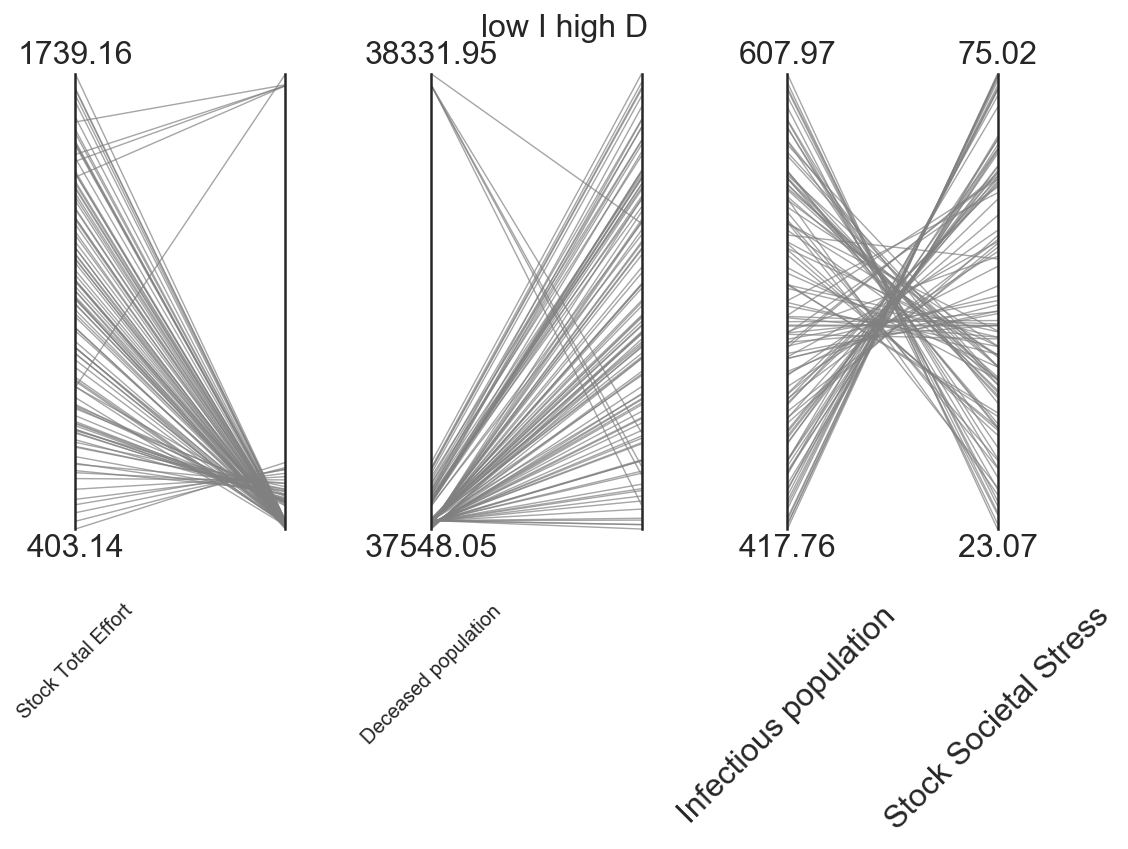

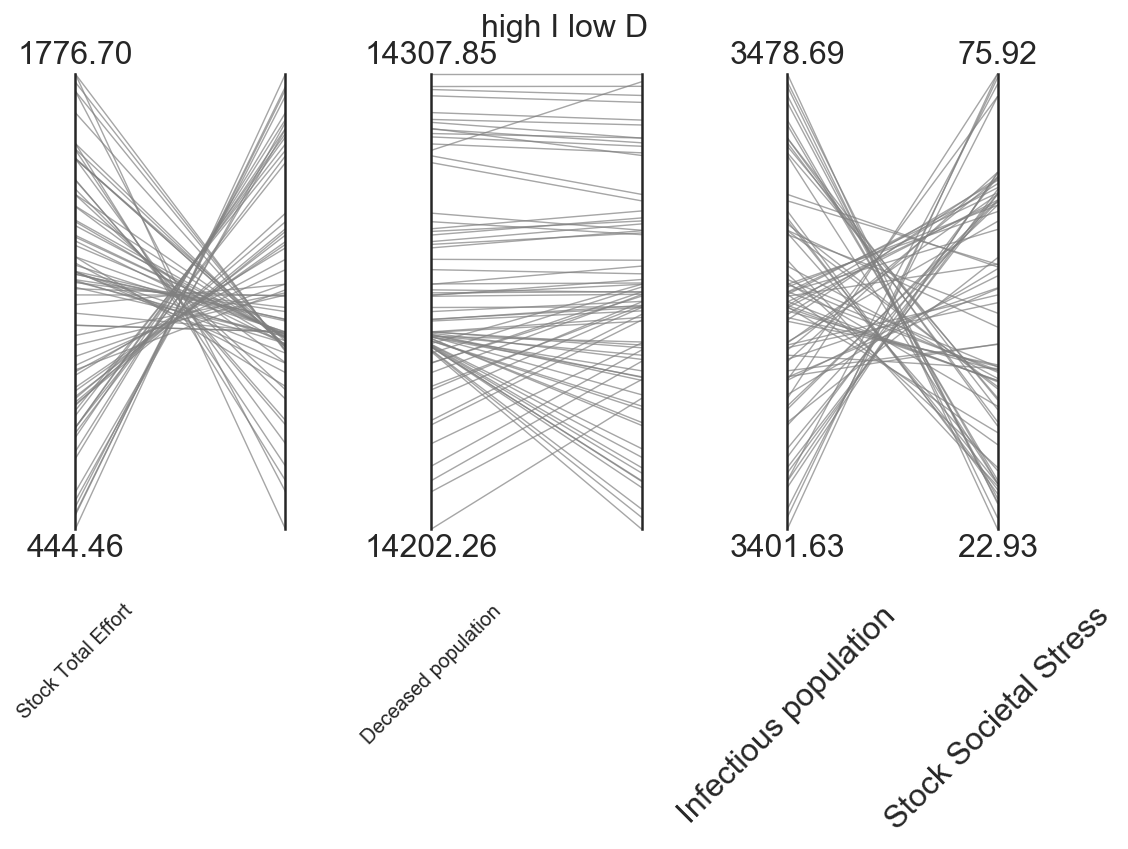

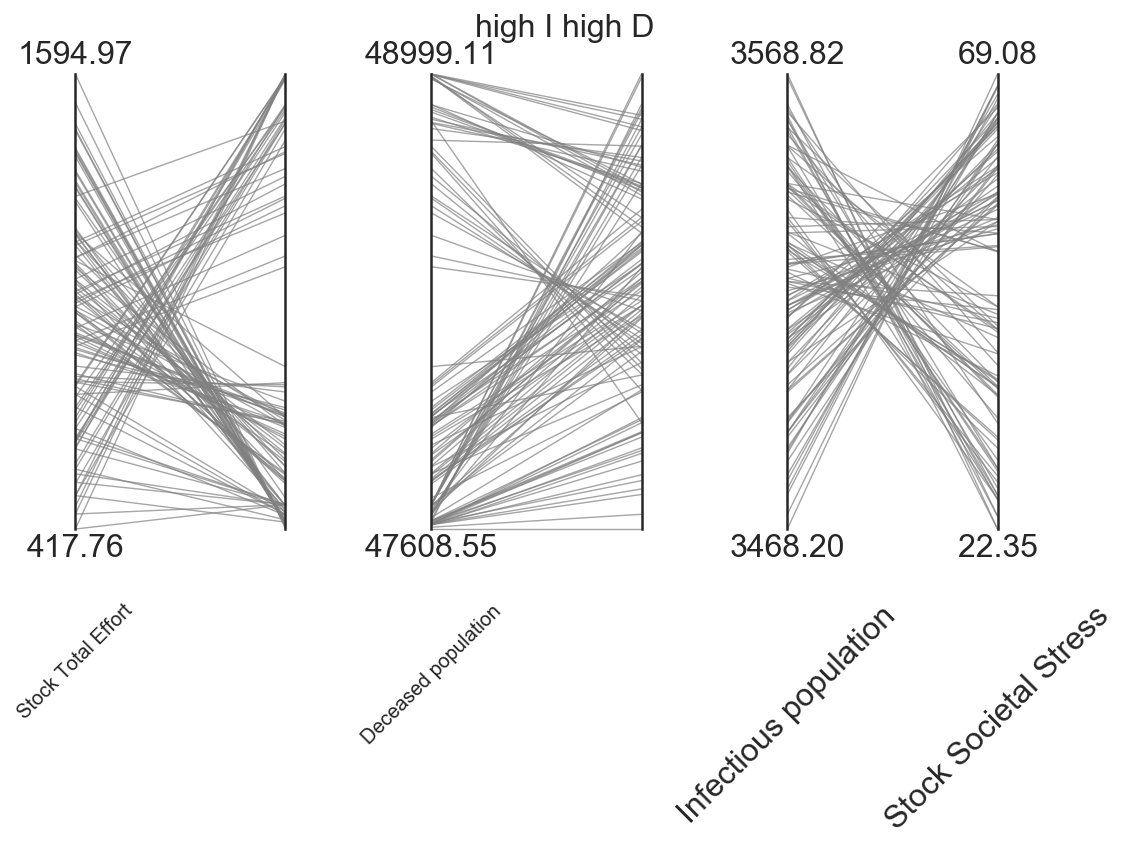

In [4]:
for i, result in enumerate(results):
    title = options[i][0]+' I '+ options[i][1] + ' D'
    ParallelPlot.plot_optimal(result['outcomes'], list(result['outcomes']), title)

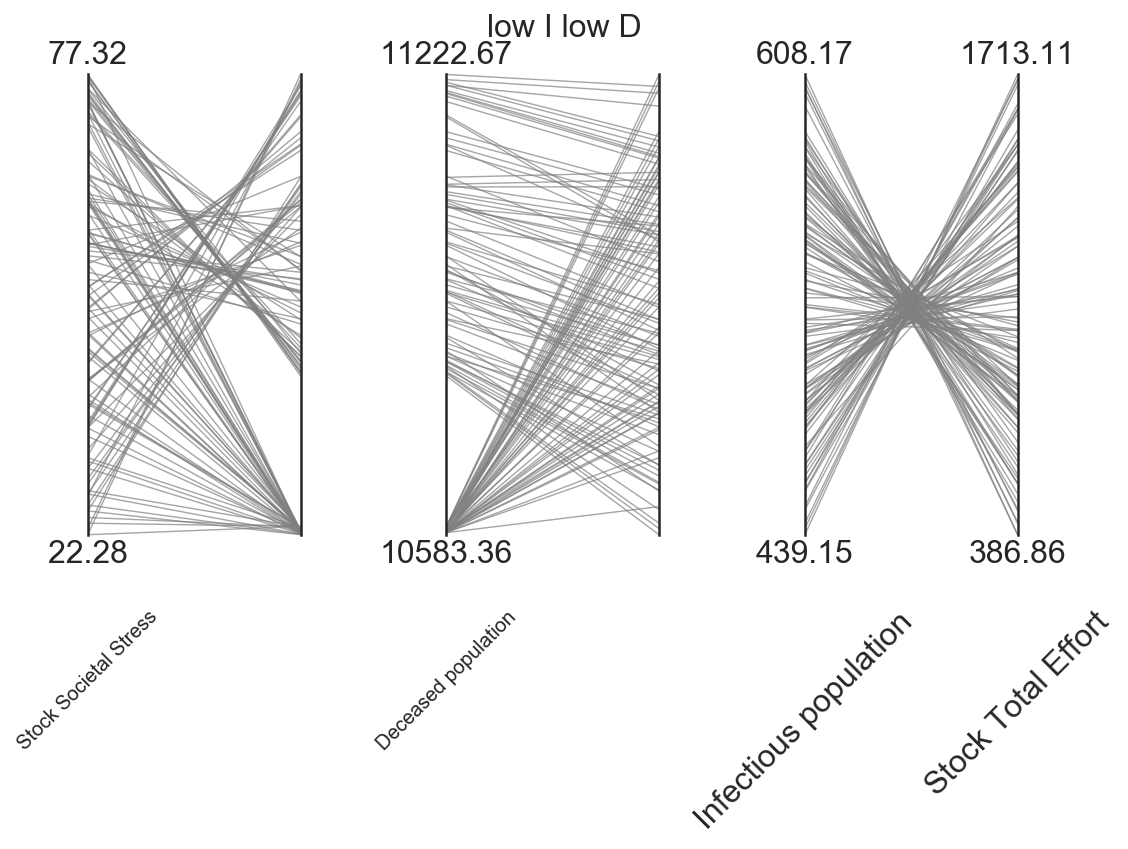

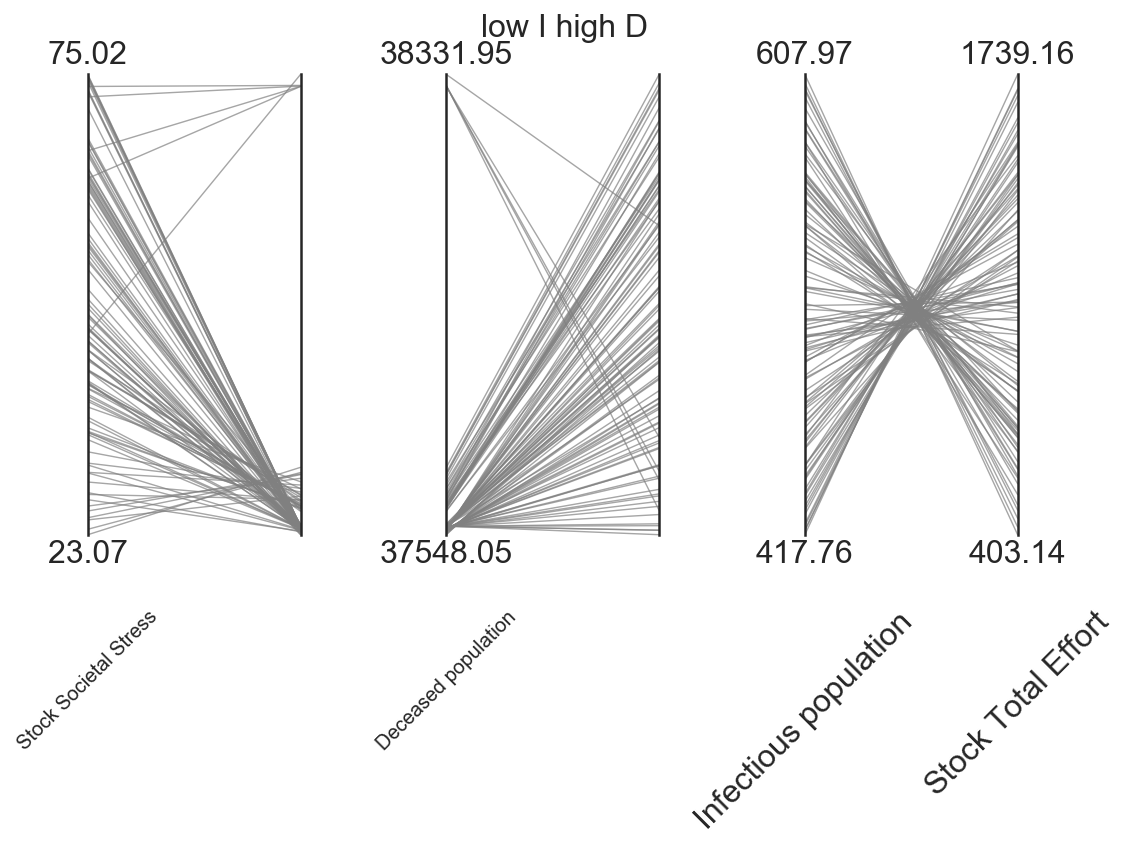

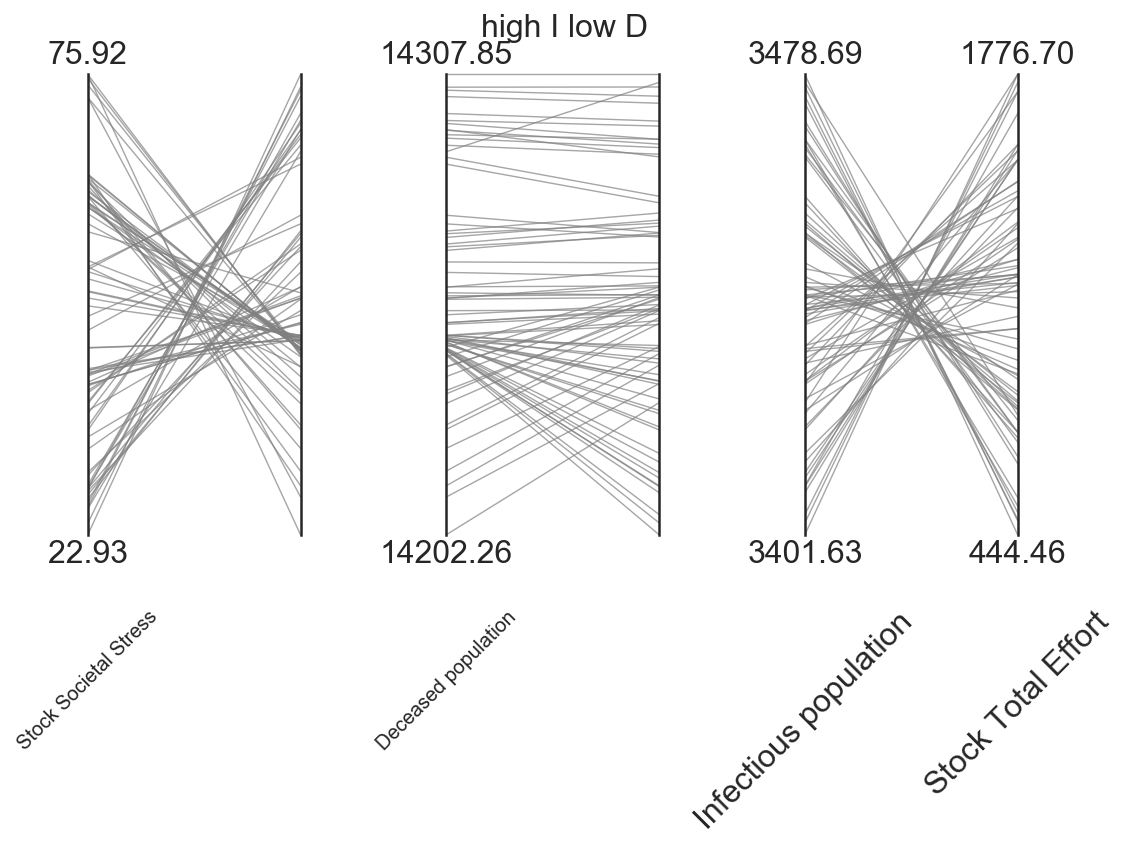

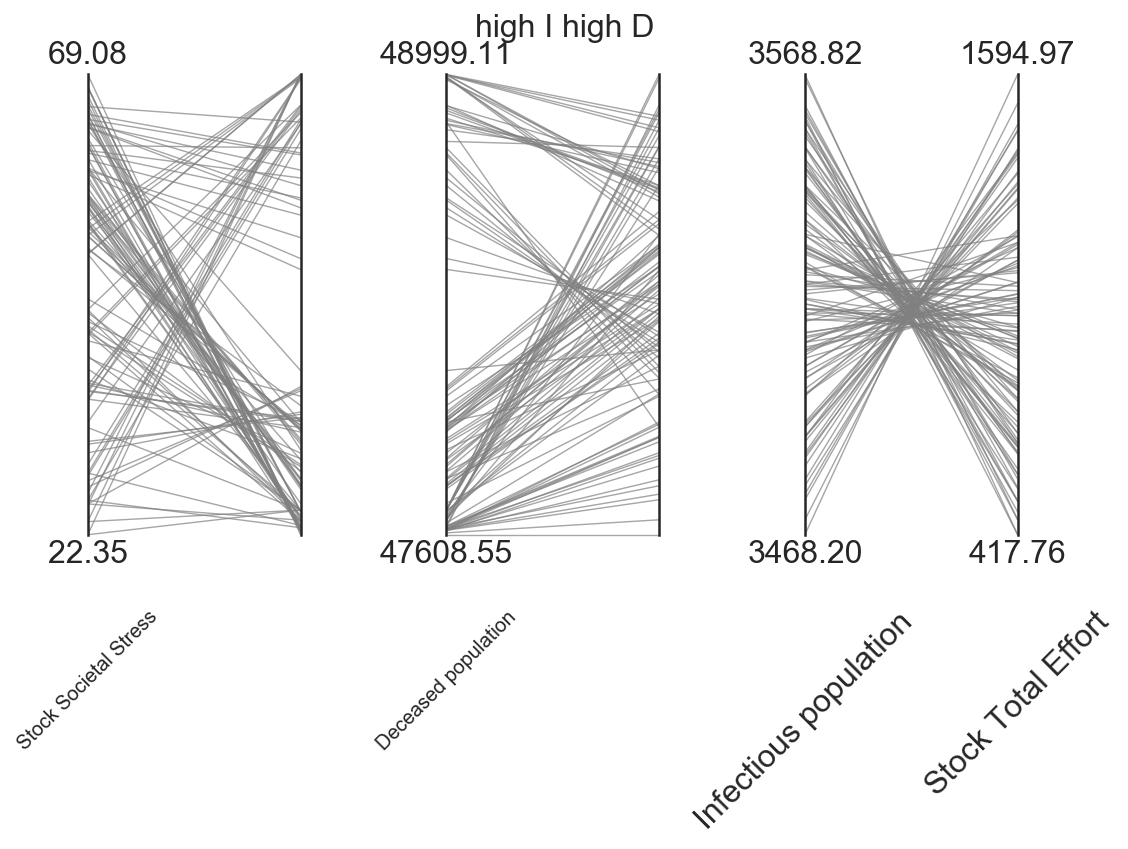

In [5]:
for i, result in enumerate(results):
    title = options[i][0]+' I '+ options[i][1] + ' D'
    
    outcomes = result['outcomes']
    cols = ['Stock Societal Stress', 'Deceased population', 'Infectious population', 'Stock Total Effort']
    outcomes = outcomes[cols]
    
    ParallelPlot.plot_optimal(outcomes, list(outcomes), title)

# Action Prevelance and Correlations
This part of the script focues on the values and relationships of the 12 action levers tested in the four multiobjective optimizatiotn runs.

The first set of analysis on actions in the set of non-dominated results shows the percentage of time that each action was turned on for each bucket. The more prevelant the action

To determine how the actions correlate with each other in the non-dominated sets, we look at a pair plot of the 12 levers. For these graphs, a steeper line indicates that actions appear together quite frequently in the set of non-dominated actions. 

We will use this information, in addition to information gathered in literature study of combating infectious disease, and previous knowledge of the field, to develop an adaptive policy plan that includes relevant actions being triggered at adaptation tipping points related to each infectious disease bucket. 

In [6]:
for i, result in enumerate(results):
    total = len(result['levers'].index)
    title = options[i][0]+' I '+ options[i][1] + ' D'
    print(title)
    new_result = result['levers'].sum()/total * 100
    print(new_result)

low I low D
Lever Social Distance I                        41.732283
Lever Social Distance II                       47.244094
Lever Social Distance III                      58.267717
Lever Public Info                              40.157480
Lever Public Edu                               43.307087
Lever Facemasks                                15.748031
Lever Tracing                                  43.307087
Lever Case Isolation                           40.157480
Lever Voluntary or Involuntary Vaccination     38.582677
Lever Vaccination                             100.000000
Lever Medical Care I                           51.181102
Lever Medical Care II                          61.417323
dtype: float64
low I high D
Lever Social Distance I                        21.100917
Lever Social Distance II                       31.192661
Lever Social Distance III                      59.633028
Lever Public Info                              34.862385
Lever Public Edu                               4

low I low D


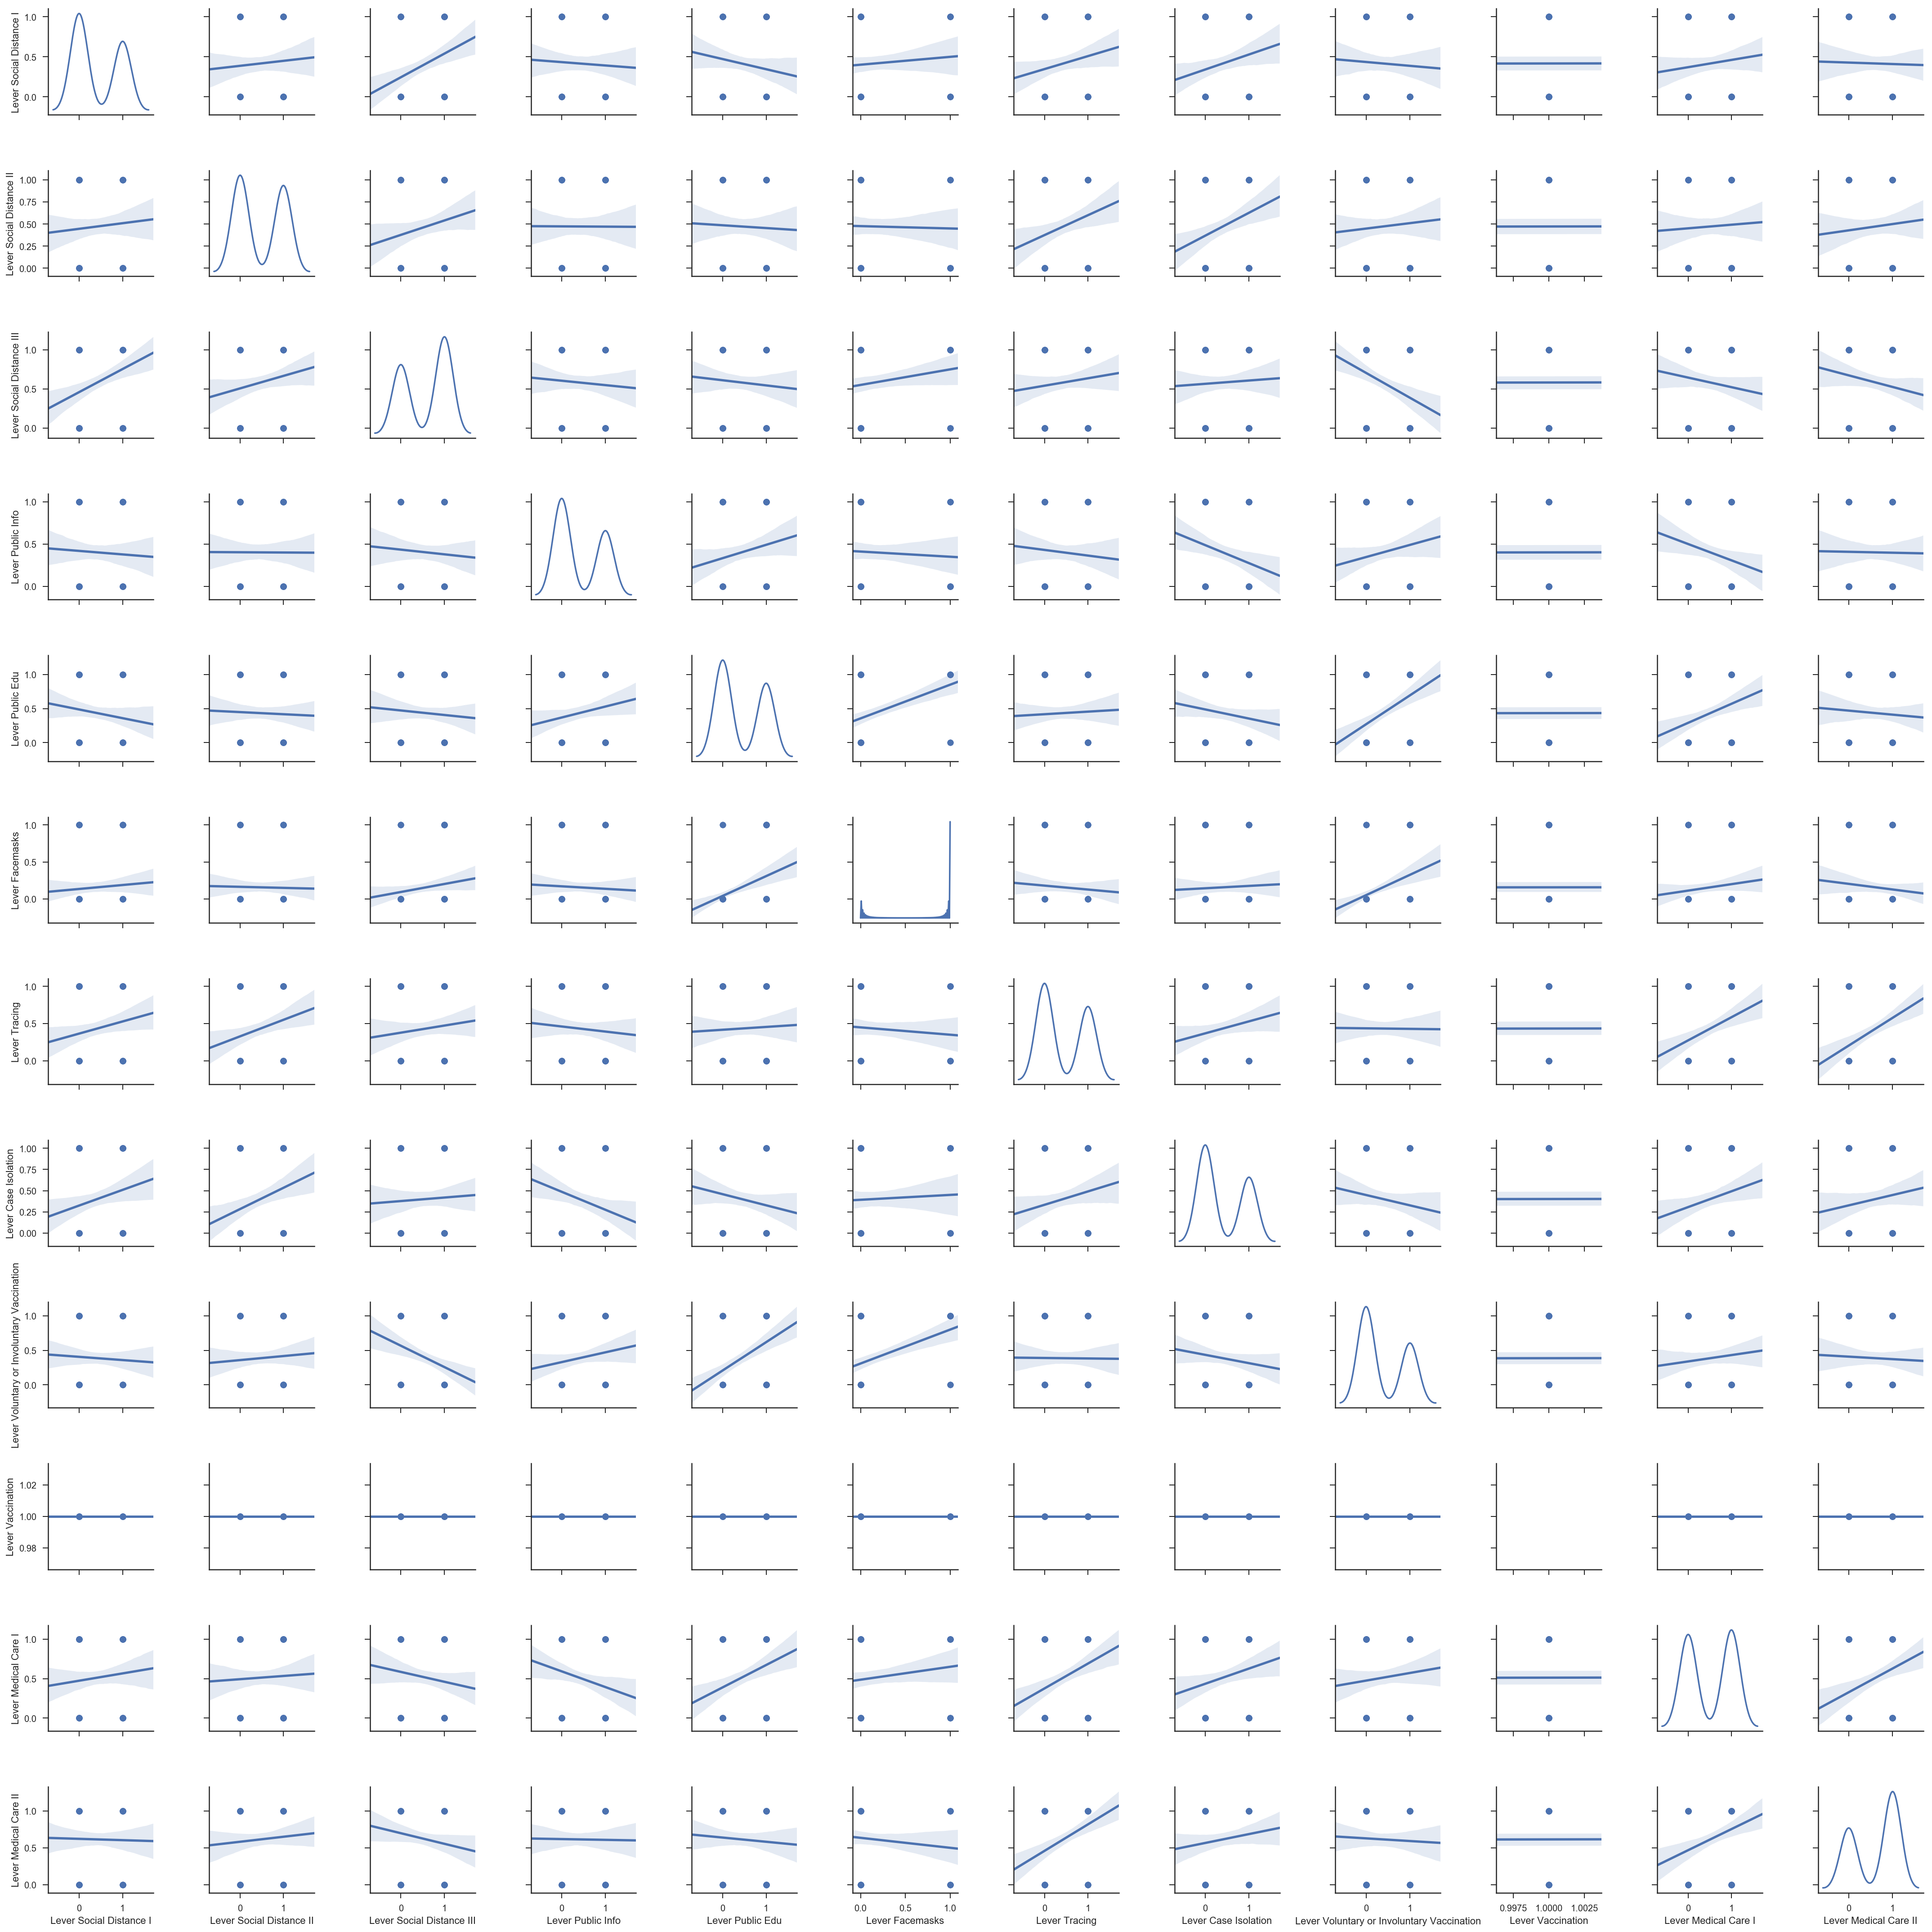

low I high D


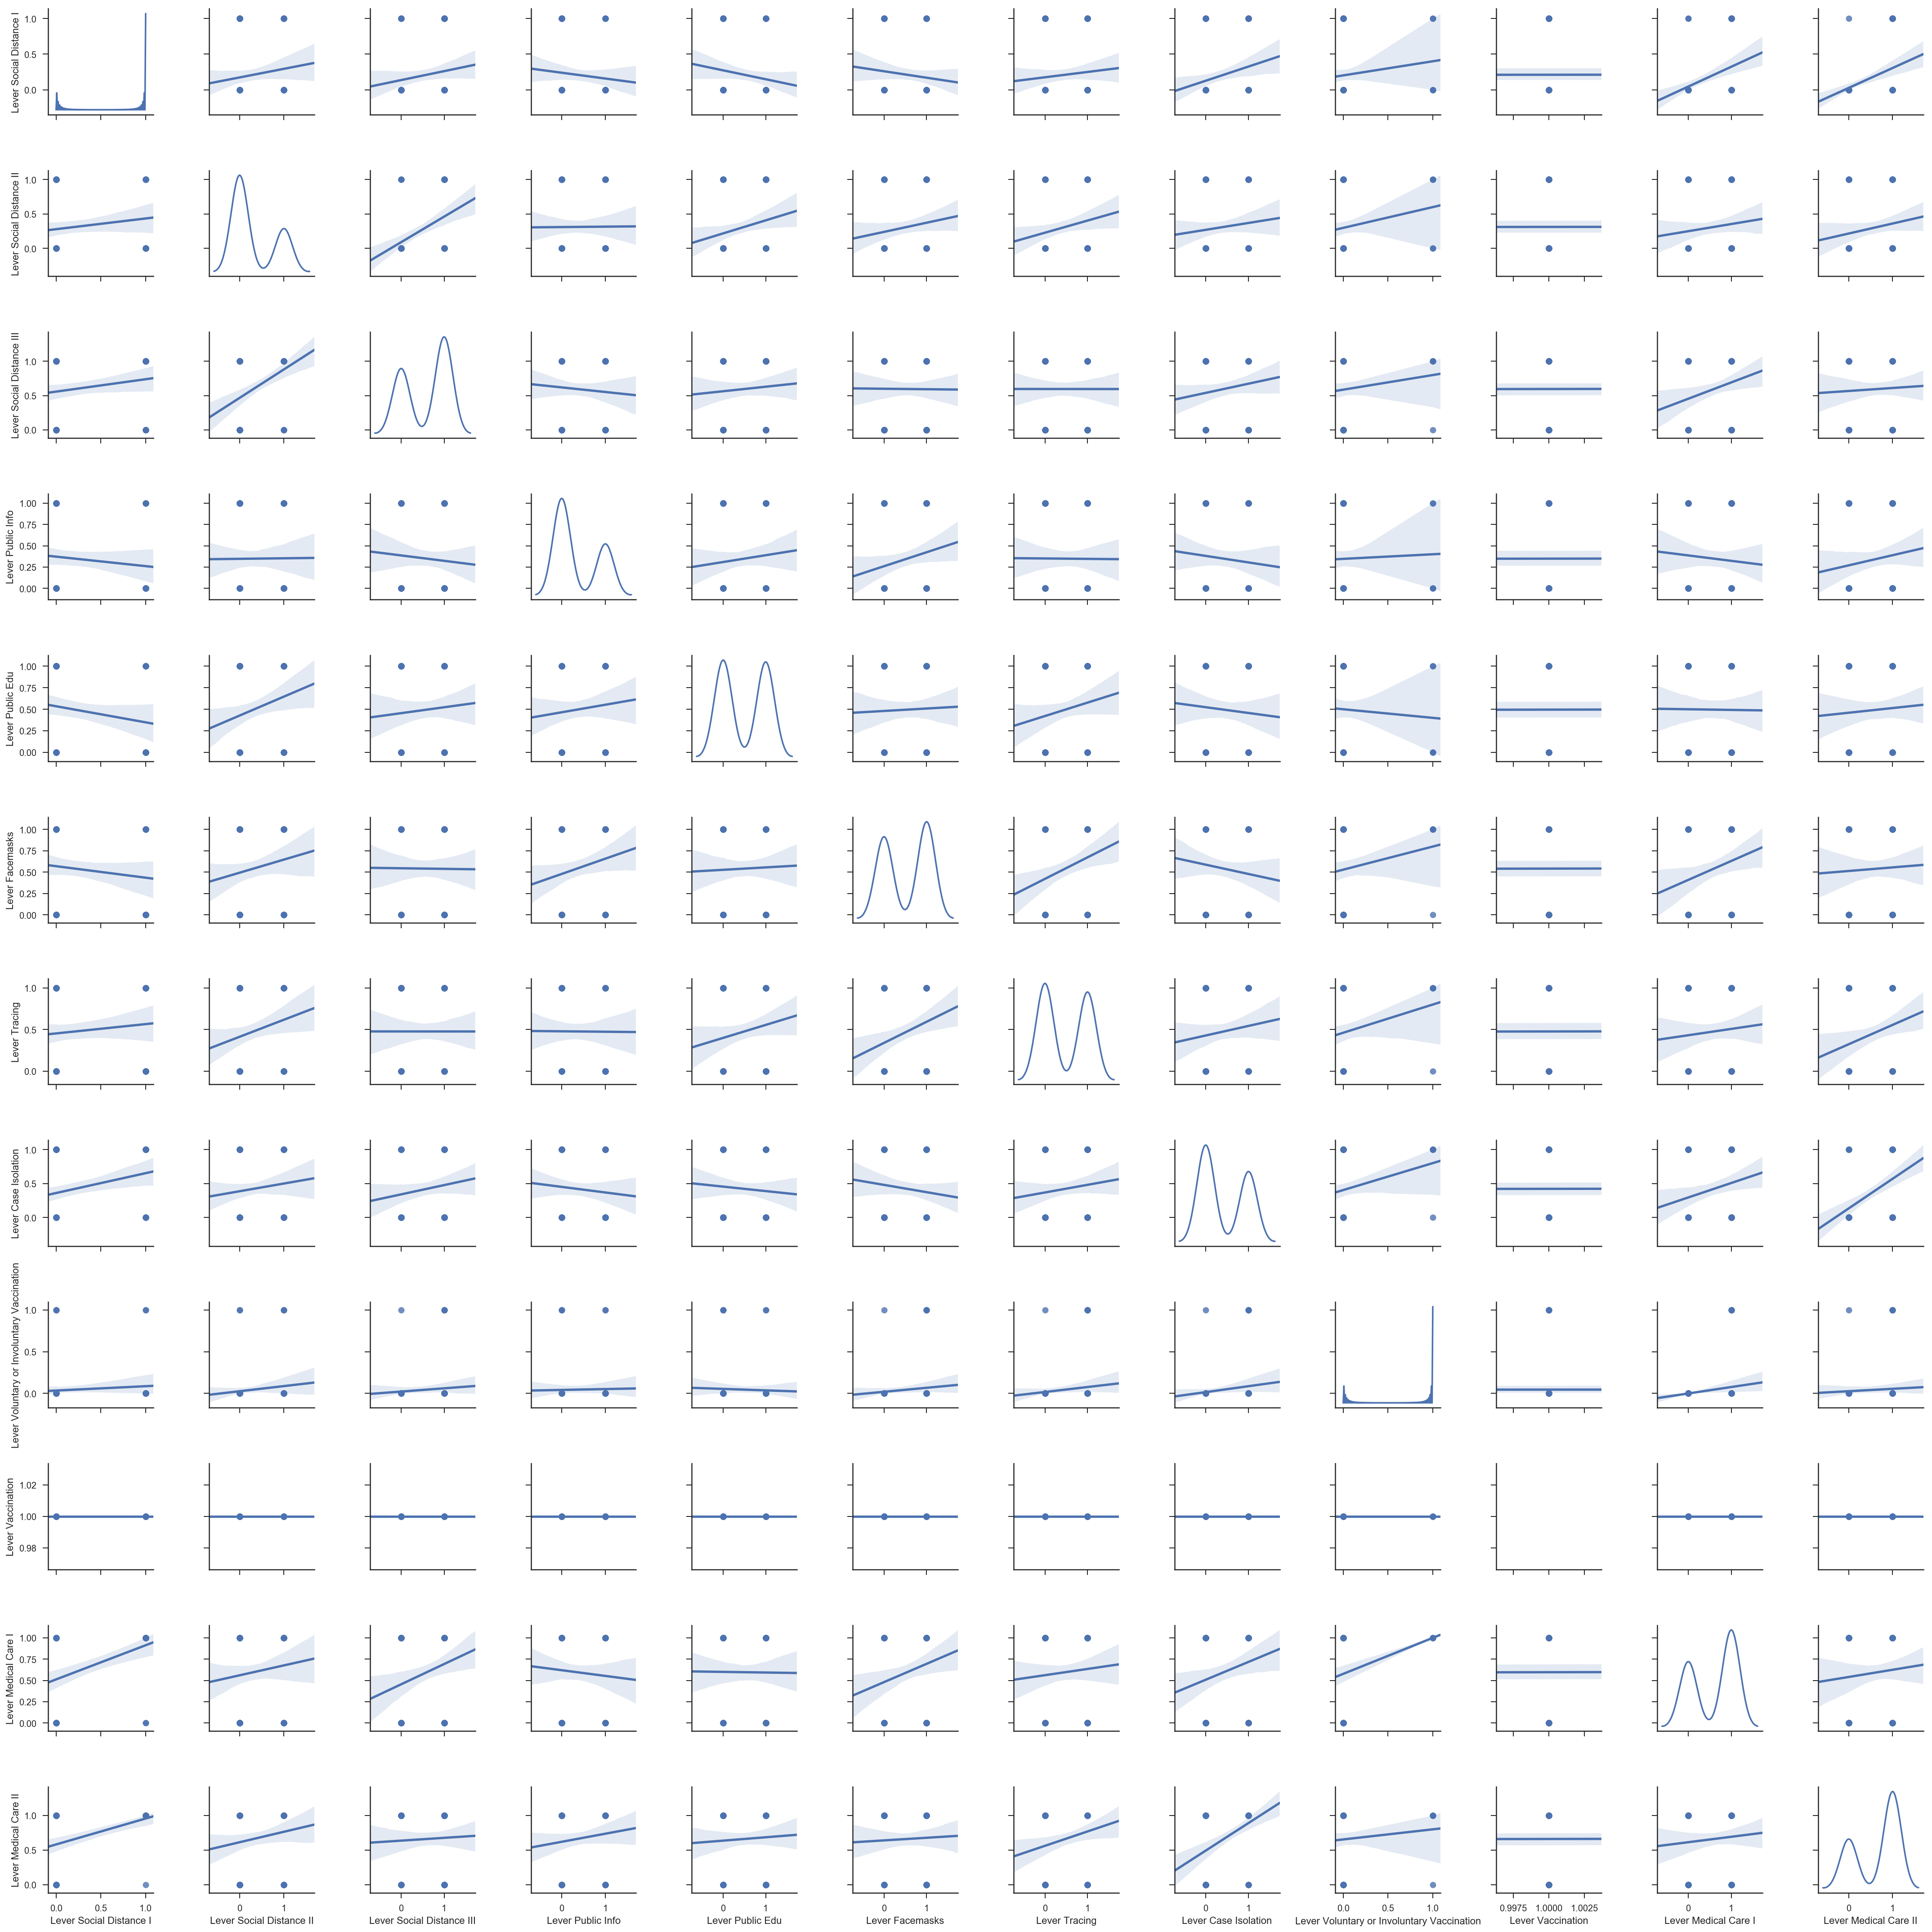

high I low D


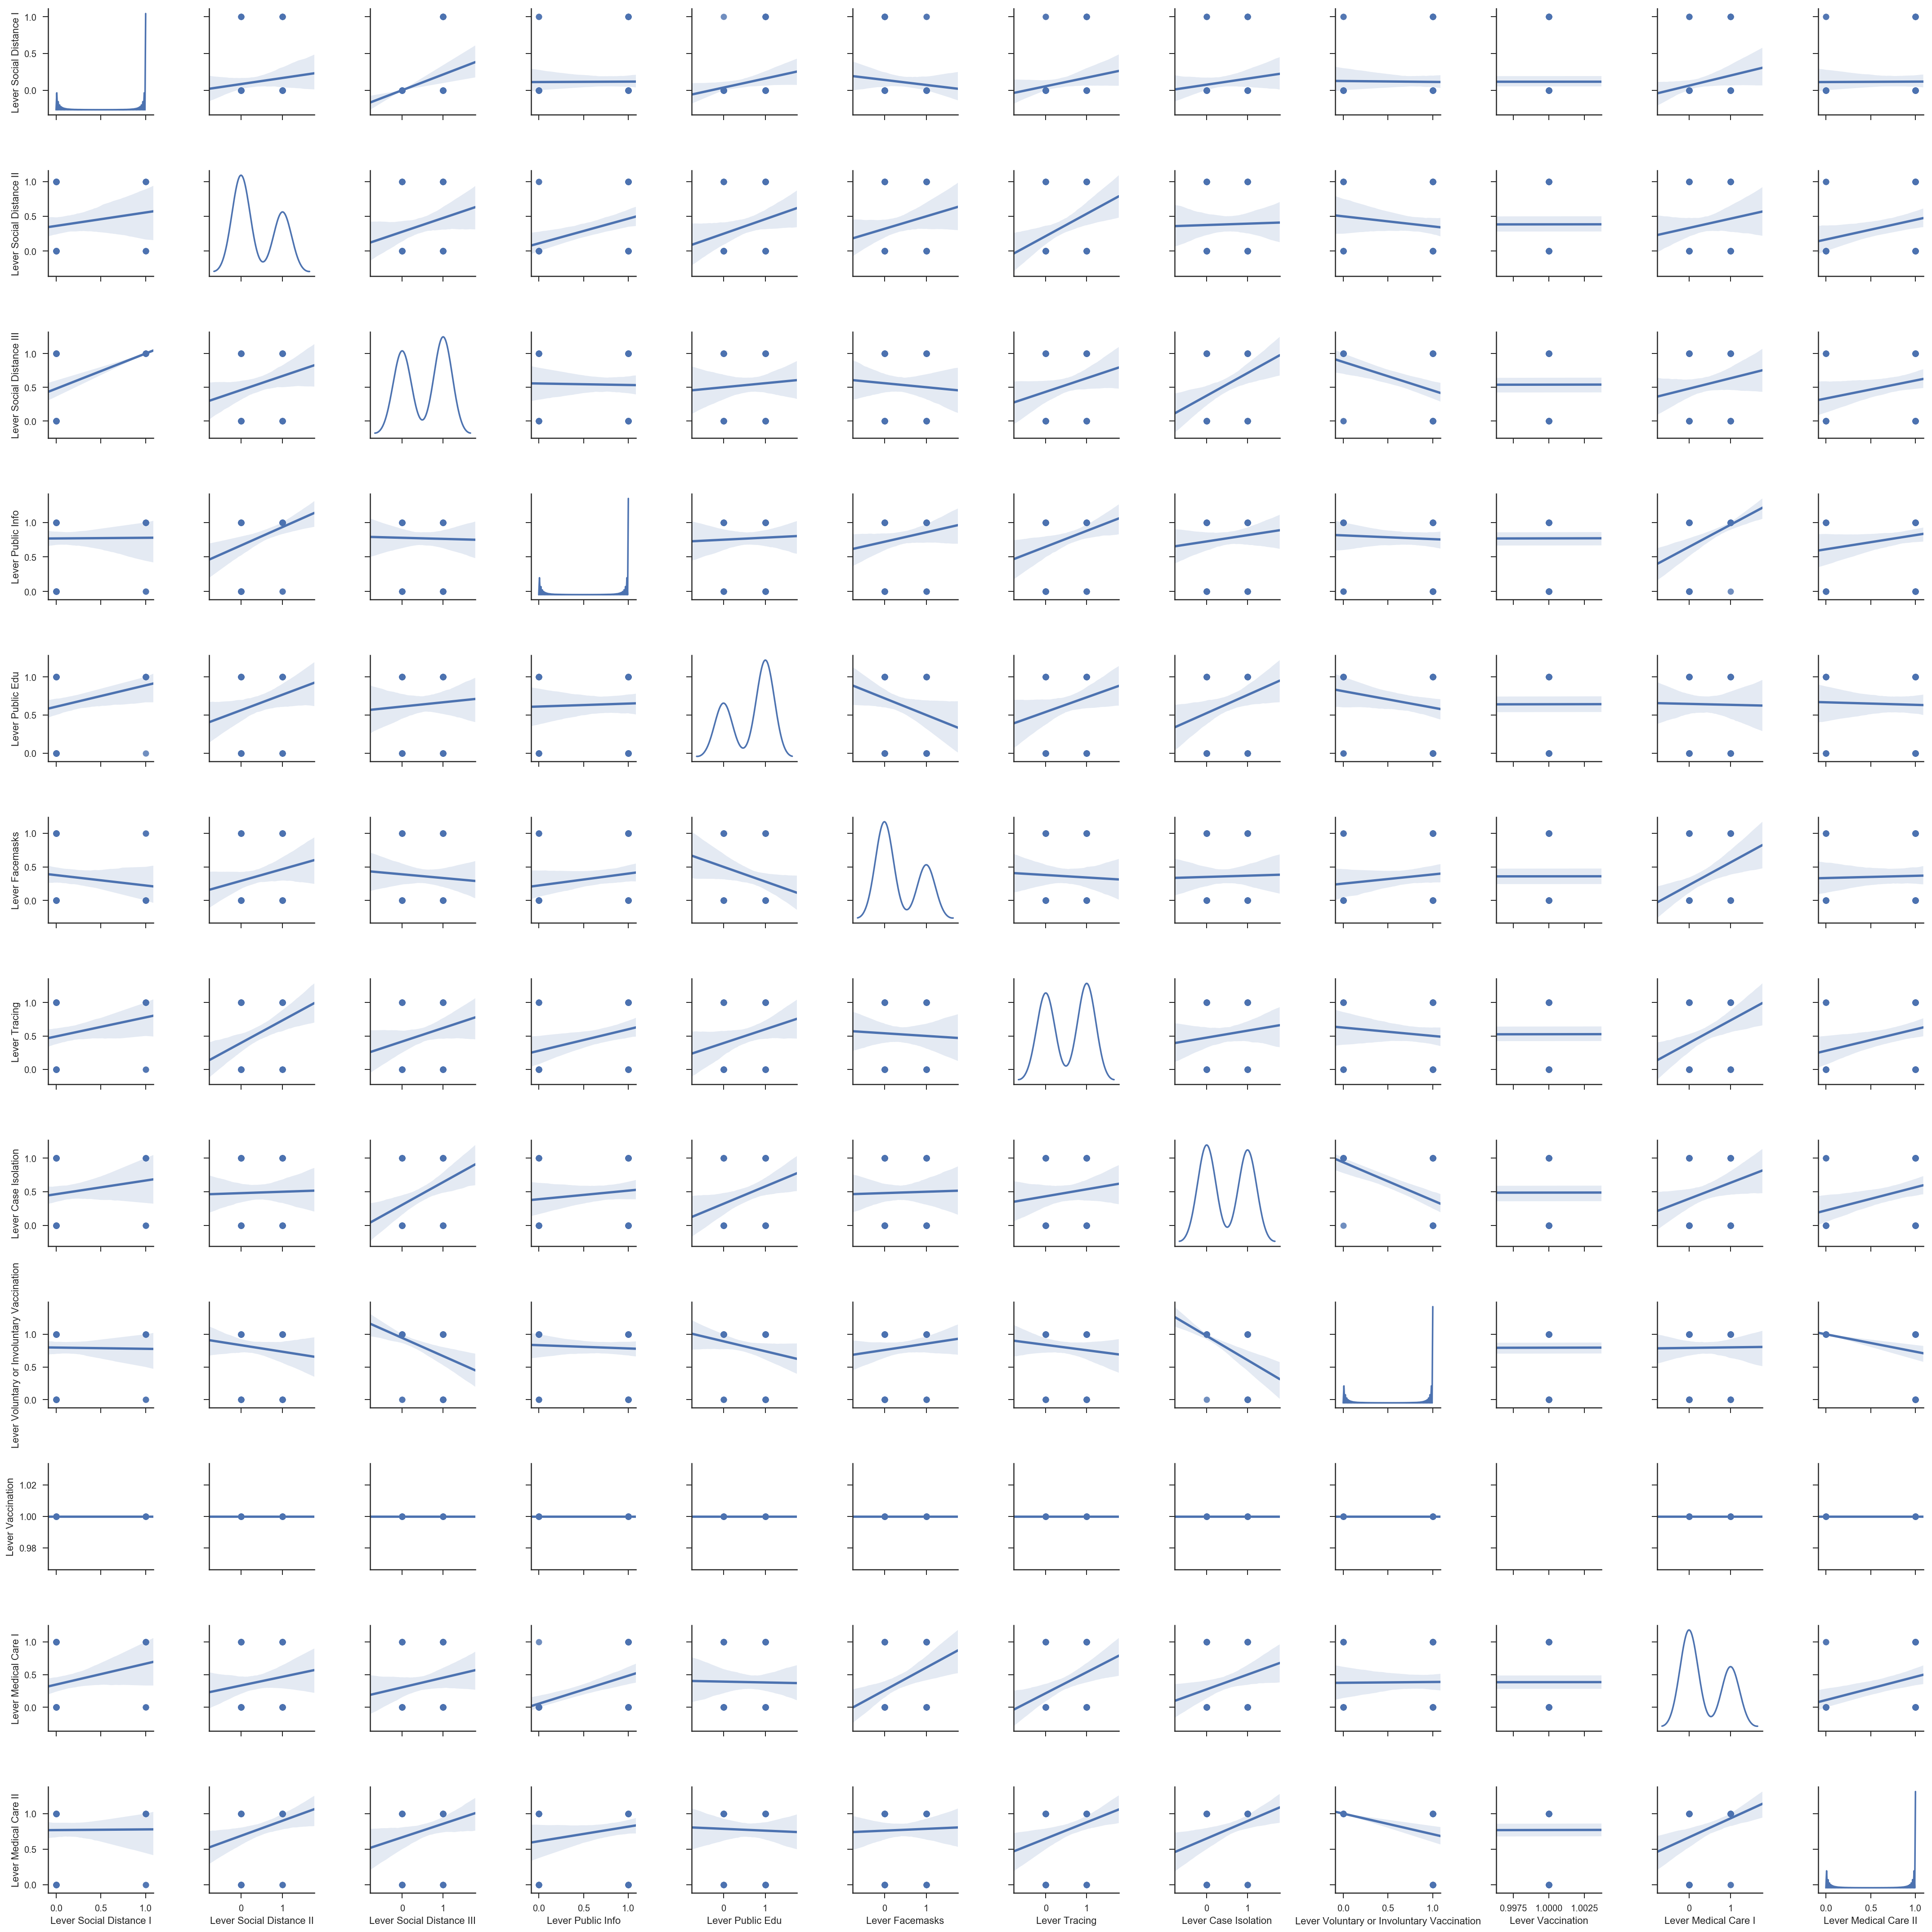

high I high D


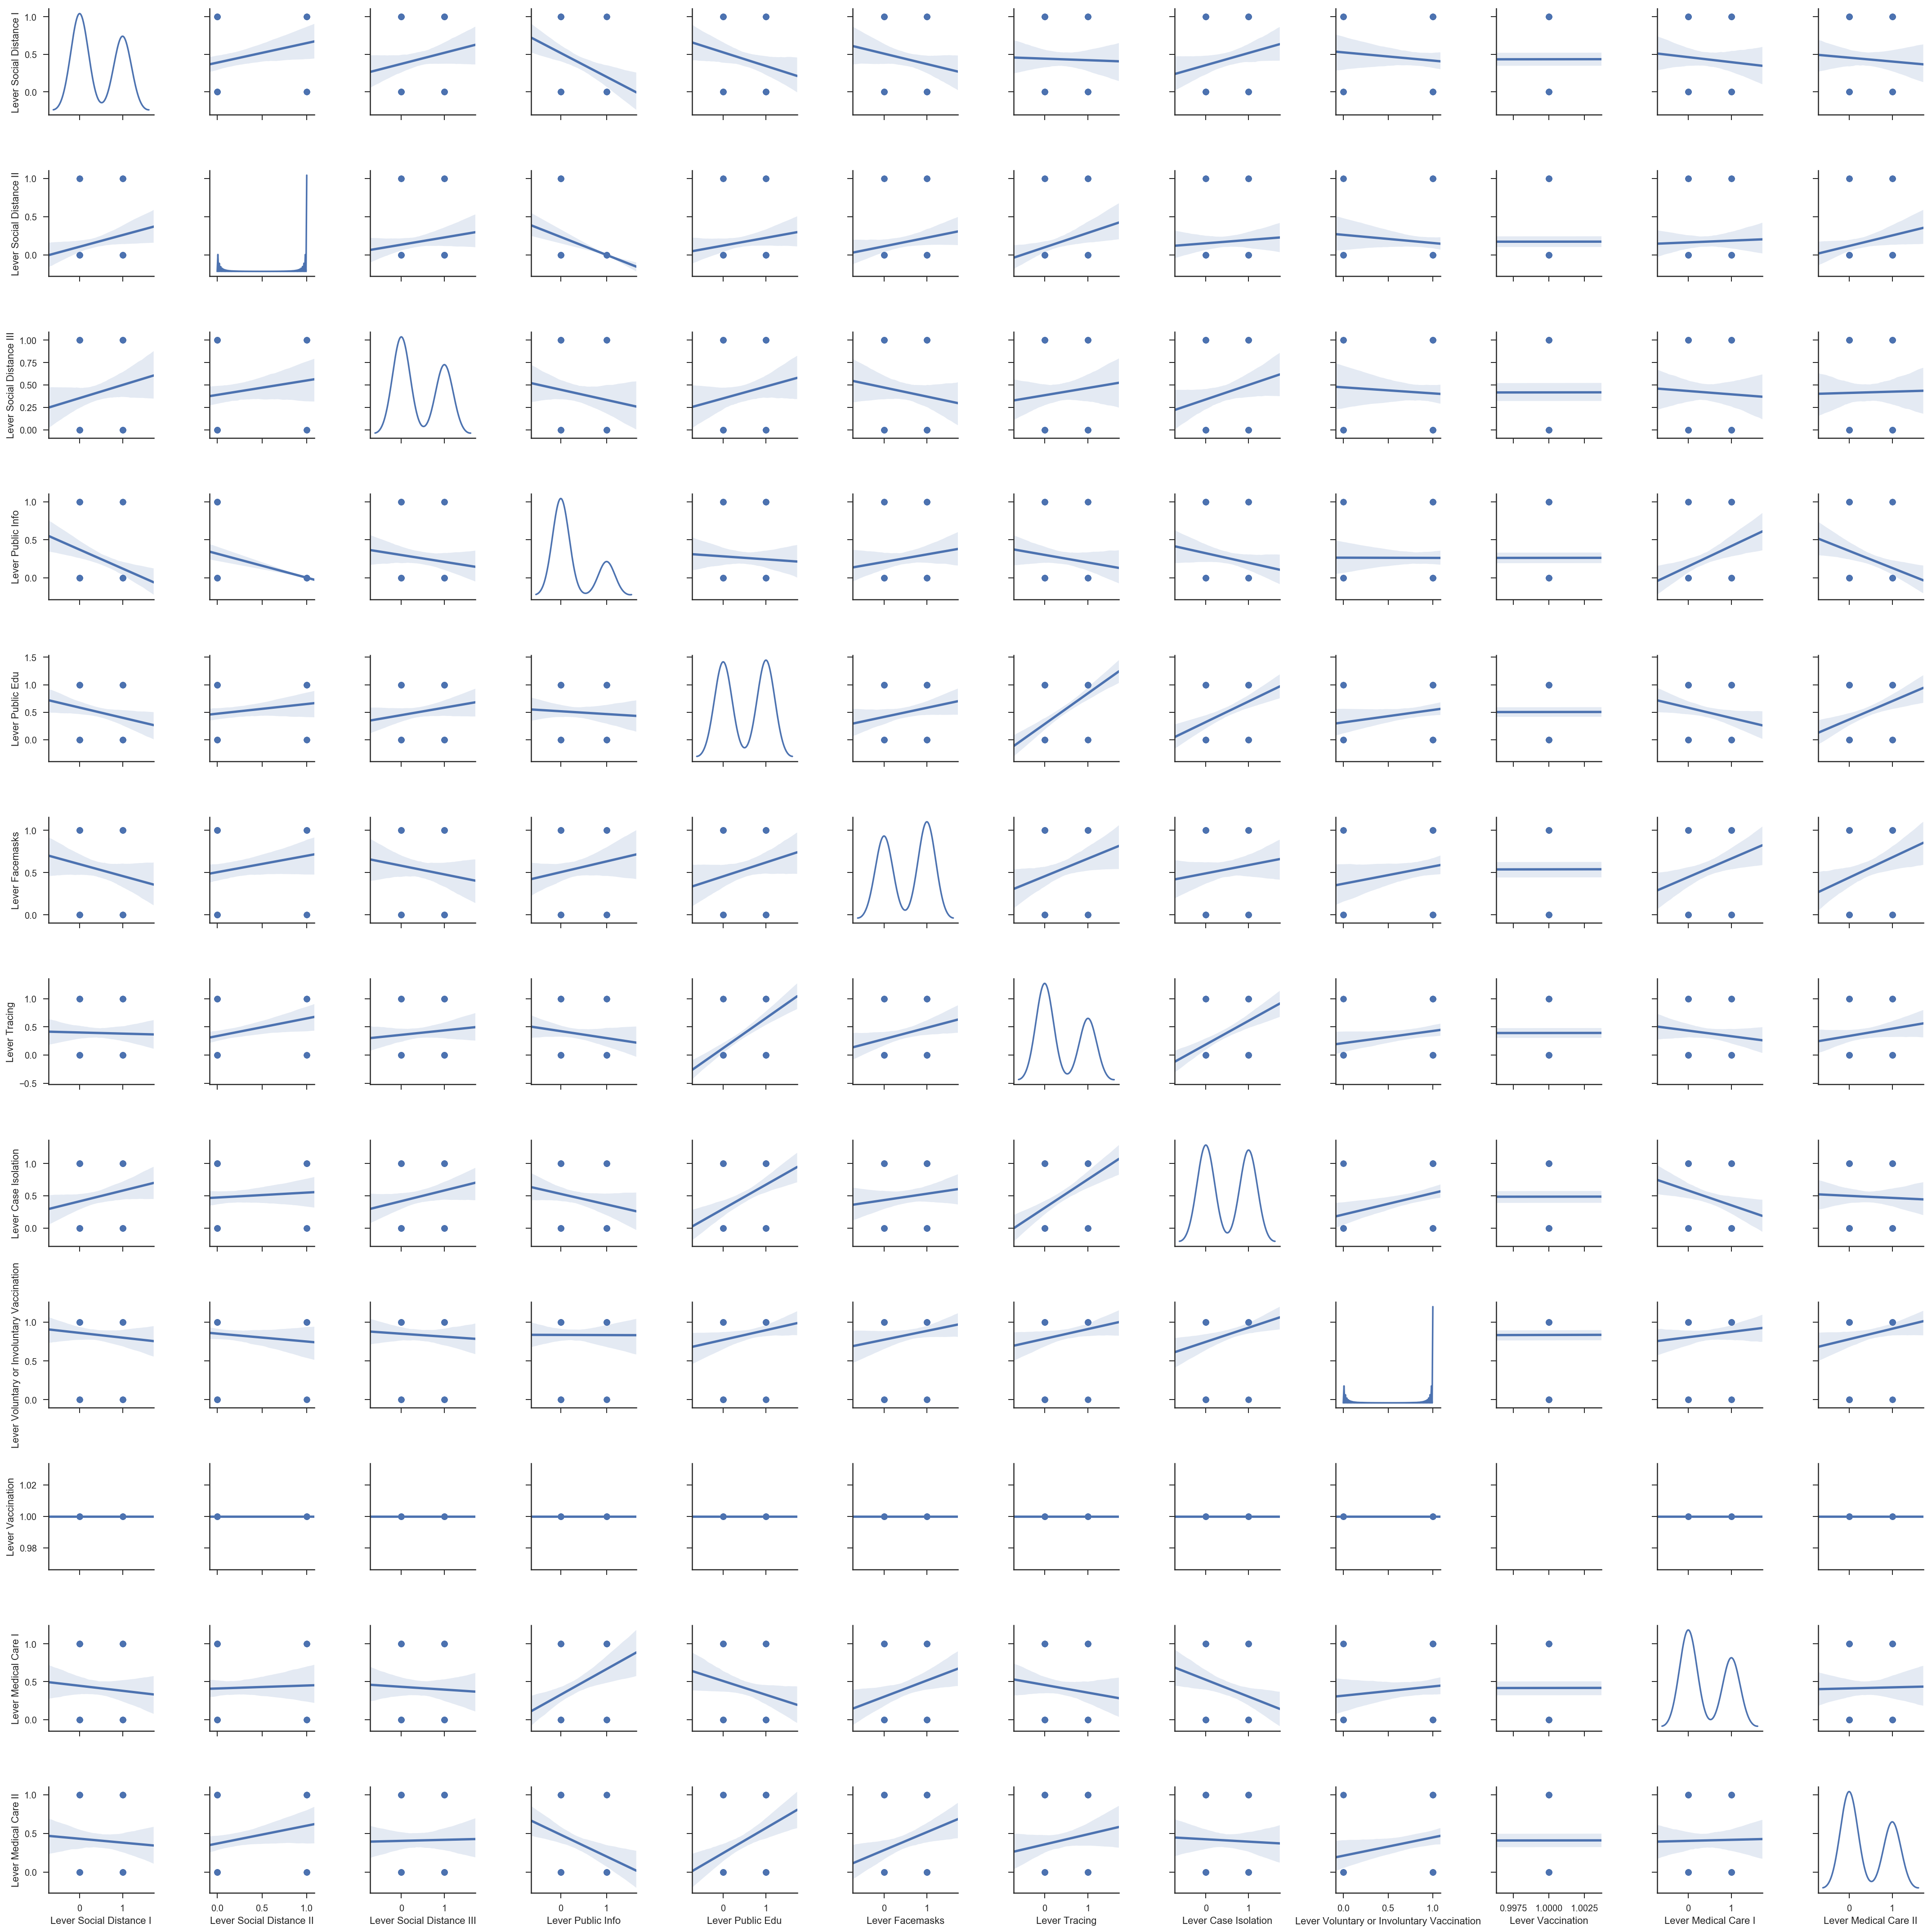

In [7]:
for i, result in enumerate(results):
    title = options[i][0]+' I '+ options[i][1] + ' D'
    print(title)
    
    plt.figure()
    sns.pairplot(result['levers'],kind='reg',diag_kind='kde')
    plt.show()

# Infectious population end value analysis

The highI results set was built from a model run with the top half of the uncertainty range for `Basic reproduction number`, while lowI was built with the bottom half. Each plot contains the last value of the `Infectious population` stock for each model run. Notice that the highI results are predominately significantly lower than the lowI results. 

In [8]:
from ema_workbench import (load_results)

highI = load_results('data/highI.tar.gz')
lowI = load_results('data/lowI.tar.gz')

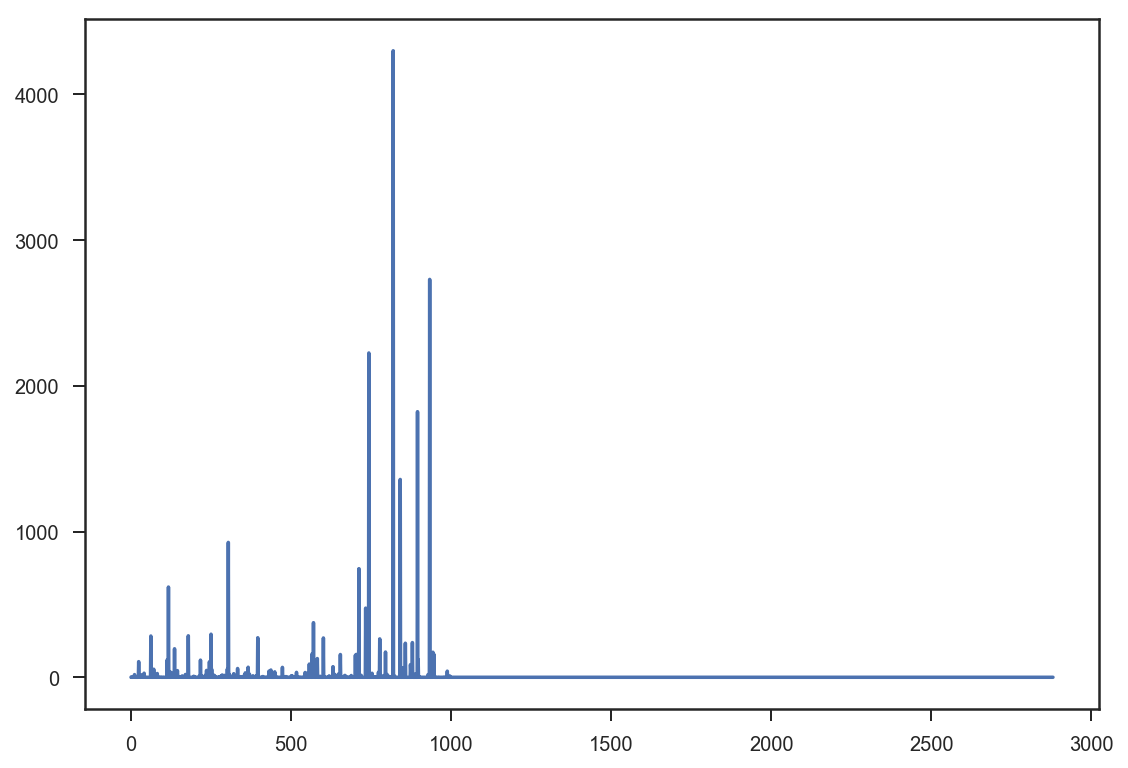

In [9]:
exp, out = highI
x =  np.zeros(len(out['Infectious population'][0]))
for index, arr in enumerate(out['Infectious population']):
    x[index] = arr[-1]

plt.plot(x)
plt.show()

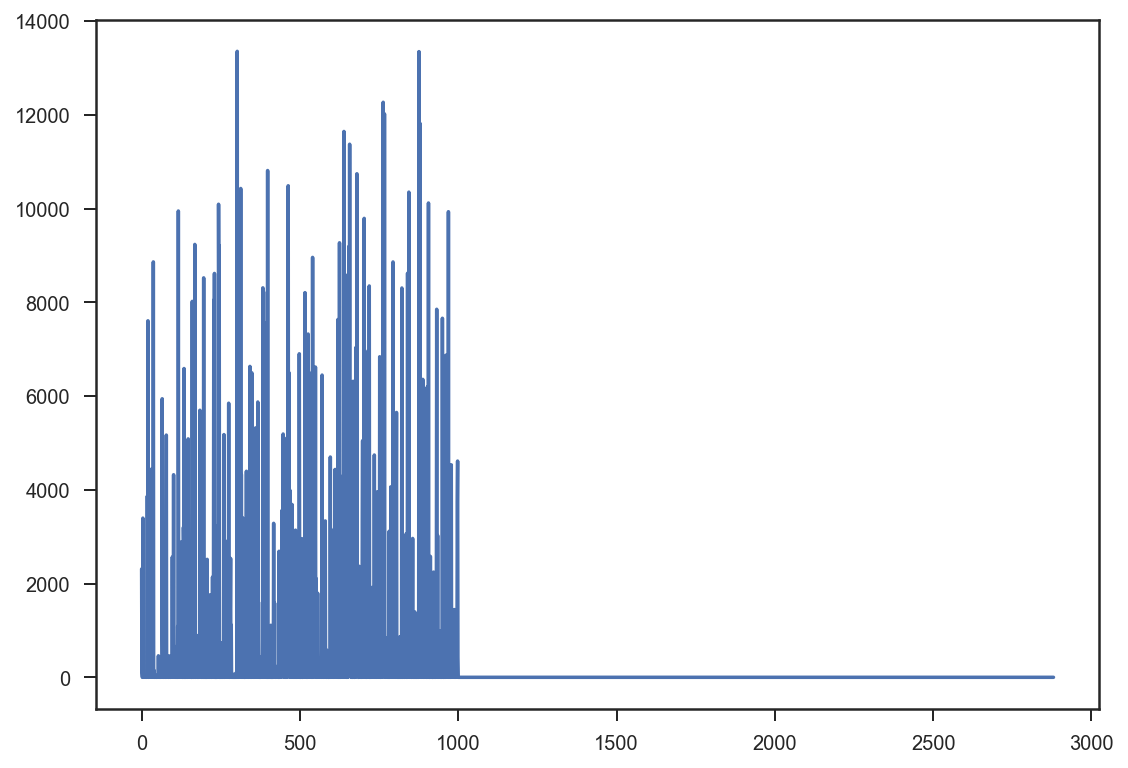

In [10]:
exp, out = lowI
x =  np.zeros(len(out['Infectious population'][0]))
for index, arr in enumerate(out['Infectious population']):
    x[index] = arr[-1]

plt.plot(x)
plt.show()